In [96]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 구역별 유동인구

In [97]:
# 유동인구 데이터 불러오기
float_path = '/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv'
ft = pd.read_csv(float_path)
ft.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# 날짜를 datetime으로 바꾸기
date = []

for data in ft['date']:
  date.append(datetime.strptime(str(data),'%Y-%m-%d'))

In [100]:
# 유동인구 컬럼 정리
ft['date'] = date
ft = ft[['date','city','fp_num']]
ft

,date,city,fp_num
0,2020-01-01,Dobong-gu,19140
1,2020-01-01,Dobong-gu,19950
2,2020-01-01,Dongdaemun-gu,25450
3,2020-01-01,Dongdaemun-gu,27050
4,2020-01-01,Dongjag-gu,28880
...,...,...,...
1084795,2020-05-31,Dobong-gu,27620
1084796,2020-05-31,Songpa-gu,56560
1084797,2020-05-31,Gangdong-gu,38960
1084798,2020-05-31,Guro-gu,25420


In [101]:
# 구별 유동인구
ft_gu = ft.groupby(['city']).mean()
ft_gu

,fp_num
city,
Dobong-gu,20048.519082
Dongdaemun-gu,24221.652148
Dongjag-gu,26070.771110
Eunpyeong-gu,28041.551899
Gangbuk-gu,19911.660444
Gangdong-gu,27832.631361
Gangnam-gu,48831.048811
Gangseo-gu,36899.837528
Geumcheon-gu,18908.174087


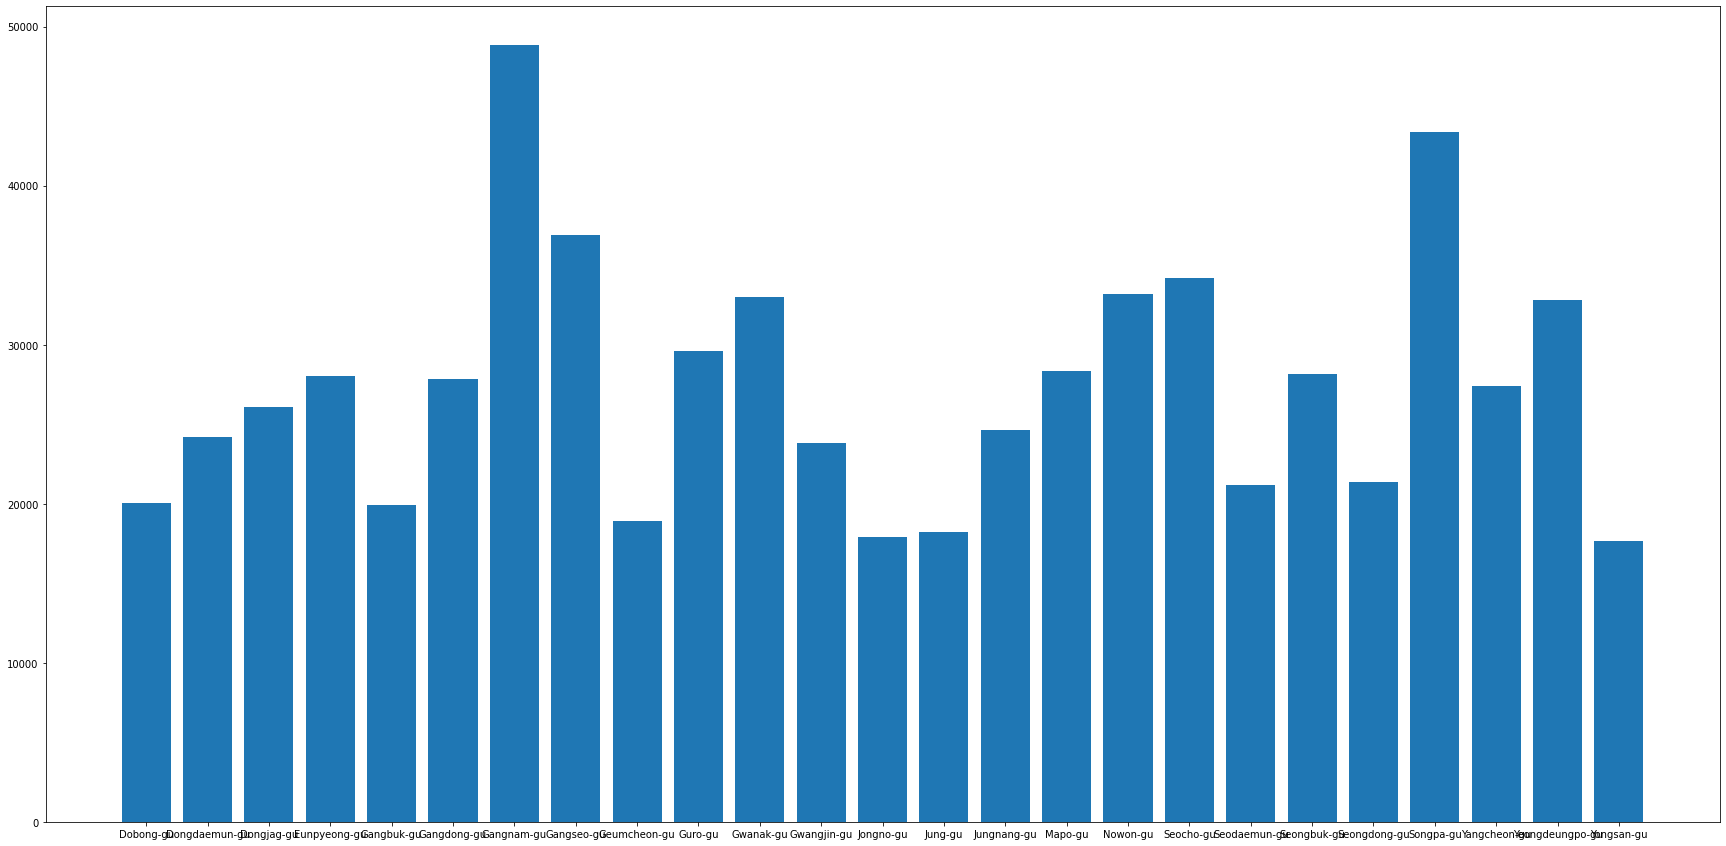

In [102]:
# 구별 유동인구 그래프 확인
x = ft_gu.index
y = ft_gu['fp_num']

plt.figure(figsize=(30,15))

plt.bar(x,y)
plt.show()

In [103]:
# 구역별 확진자수 데이터 불러오고 정리
gu=pd.read_csv('/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/PatientInfo.csv')
gu = gu[gu['province']=='Seoul']
gu = gu[gu['city']!='etc']
gu = gu[['city','confirmed_date']]
gu


,city,confirmed_date
0,Gangseo-gu,2020-01-23
1,Jungnang-gu,2020-01-30
2,Jongno-gu,2020-01-30
3,Mapo-gu,2020-01-30
4,Seongbuk-gu,2020-01-31
...,...,...
1306,Mapo-gu,2020-06-29
1307,Mapo-gu,2020-06-29
1308,Mapo-gu,2020-06-29
1309,Geumcheon-gu,2020-06-29


In [104]:
# 확진자수 count
gu_confirm_count = gu.groupby('city').count()
gu_confirm_count 

,confirmed_date
city,
Dobong-gu,62
Dongdaemun-gu,38
Dongjak-gu,53
Eunpyeong-gu,53
Gangbuk-gu,24
Gangdong-gu,35
Gangnam-gu,83
Gangseo-gu,78
Geumcheon-gu,32


In [105]:
# 인덱스를 다시 열로 변환
gu_confirm_count = gu_confirm_count.reset_index()
gu_confirm_count

,city,confirmed_date
0,Dobong-gu,62
1,Dongdaemun-gu,38
2,Dongjak-gu,53
3,Eunpyeong-gu,53
4,Gangbuk-gu,24
5,Gangdong-gu,35
6,Gangnam-gu,83
7,Gangseo-gu,78
8,Geumcheon-gu,32
9,Guro-gu,85


# 구별 유동인구와 확진자수

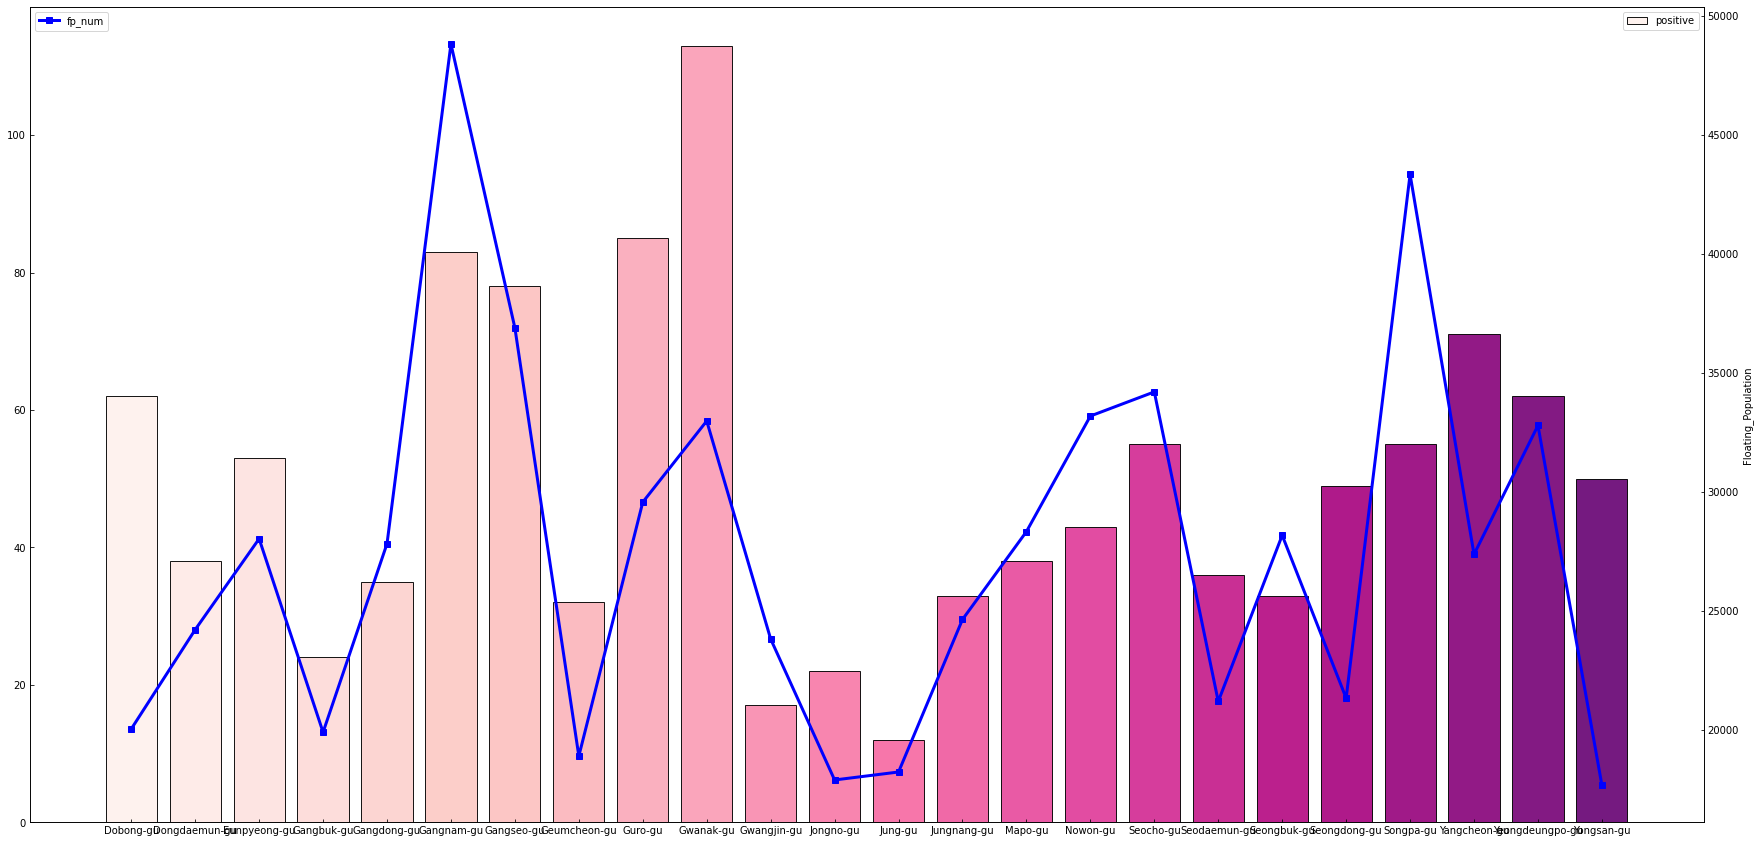

In [107]:
# 구별 유동인구와 확진자수
gu = pd.merge(ft_gu,gu_confirm_count,on='city')

plt.rcParams['figure.figsize'] =(30,15)
colors = sns.color_palette("RdPu",25)

x = gu['city']
y1 = gu['fp_num']
y2 = gu['confirmed_date']

fig, ax1 = plt.subplots()


ax1.bar(x, y2, color=colors, alpha=0.9, width=0.8,label='positive', edgecolor='black')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()

ax2.plot(x, y1,'-s',color='b',linewidth=3,label='fp_num')
ax2.set_xlabel('region')
ax2.set_ylabel('Floating_Population') 
ax2.tick_params(axis='y', direction='in')

ax1.legend(loc='best') 
ax2.legend(loc='upper left')

plt.show()


